<a href="https://colab.research.google.com/github/microprediction/timeseries-notebooks/blob/main/simdkalman_hello.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install simdkalman

In [ ]:
!pip install microprediction

# Hello world example
See https://www.microprediction.com/blog/popular-timeseries-packages for more packages

In [3]:
from microprediction import MicroReader
mr = MicroReader()
YS = mr.get_lagged_values(name='emojitracker-twitter-face_with_medical_mask.json')[:200]



In [4]:
from simdkalman import KalmanFilter
import numpy as np 
def run(ys):
  burnin = 100
  v = np.var(ys[:burnin])
  kf = KalmanFilter(
      state_transition=[[1]],             # A
      process_noise=np.diag([v]),         # Q
      observation_model=np.array([[1]]),  # H
      observation_noise=v)                # R
  res = kf.compute(ys[:-1],n_test=1,filtered=True)
  xs = [ x[0] for x in res.filtered.states.mean ]
  return [0] + xs
XS = run(YS)
len(XS)


200

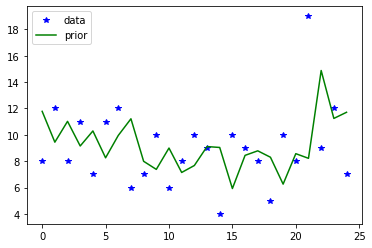

In [5]:
import matplotlib.pyplot as plt
plt.plot(YS[125:150],'*b')
plt.plot(XS[125:150],'g')
plt.legend(['data','prior'])